# 学习神经网络

不进行神经网络的学习，就做不到“好的推理”​。所谓推理，就是对上一节介绍的多类别分类等问题给出回答的任务。而神经网络的学习的任务是寻找最优参数。不进行神经网络的学习，就做不到“好的推理”​。因此，常规的流程是，首先进行学习，然后再利用学习好的参数进行推理。

损失是衡量神经网络学习好坏的一种指标，是指示学习阶段中某个时间点的神经网络的性能。基于监督数据（学习阶段获得的正确解数据）和神经网络的预测结果，将模型的恶劣程度作为标量（单一数值）计算出来，得到的就是损失。

### 损失函数

损失函数是计算神经网络的一种方法。损失函数有多种，当进行多类别分类的神经网络通常使用交叉熵误差（cross entropy error）作为损失函数。此时，交叉熵误差由神经网络输出的各类别的概率和监督标签求得。

根据之前介绍过的神经网络，从结果的三输出来看，可以视作为一种多分类神经网络。所以在原有的层基础上我们再加上交叉熵误差作为损失函数。

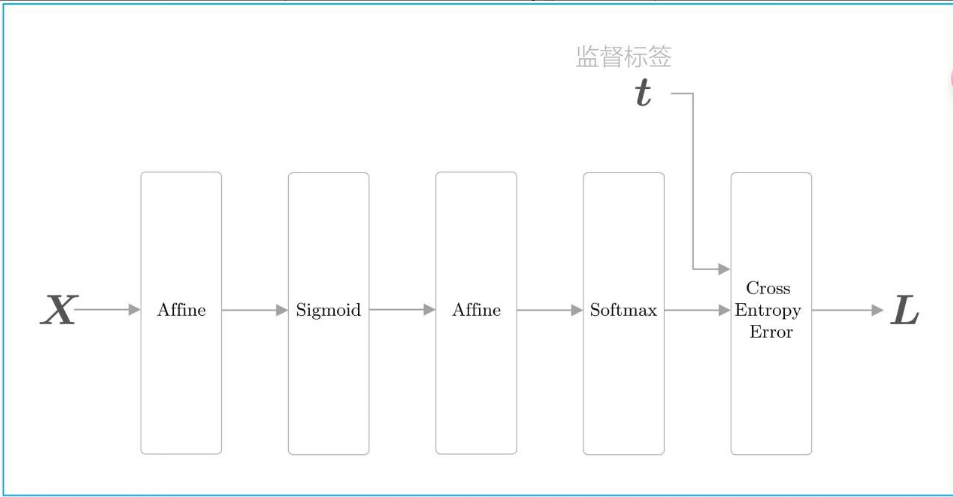

在上图中，X是输入数据，t是监督标签，L是损失。此时，Softmax层的输出是概率，该概率和监督标签被输入Cross Entropy Error层。

SoftMax函数：

$$ y_k = \frac{e^{s_k}}{\sum_{j=1}^{n} e^{s_i}} $$


当输出总共有n个时，计算第k个输出yk时的算式。这个yk是对应于第k个类别的Softmax函数的输出。如上式所示，Softmax函数的分子是得分sk的指数函数，分母是所有输入信号的指数函数的和。Softmax函数输出的各个元素是0.0～1.0的实数。另外，如果将这些元素全部加起来，则和为1。因此，Softmax的输出可以解释为概率。之后，这个概率会被输入交叉熵误差。此时，

交叉熵误差可由下式表示：

$$ L = - \sum_{i=1}^{n} t_k \log(\hat{y}_k) $$

这里，tk是对应于第k个类别的监督标签。log是以纳皮尔数e为底的对数（严格地说，应该记为loge）​。监督标签以one-hot向量的形式表示，比如t=（0, 0,1）​。

### Tip:One-hot向量

one-hot向量是一个元素为1，其他元素为0的向量。因为元素1对应正确解的类，所以式（1.7）实际上只是在计算正确解标签为1的元素所对应的输出的自然对数（log）​。

在考虑了mini-batch处理的情况下，交叉熵误差可以由下式表示：

$$ L = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log(\hat{y}_{nk}) $$


这里假设数据有N笔，tnk表示第n笔数据的第k维元素的值，ynk表示神经网络的输出，tnk表示监督标签。式（1.8）看上去有些复杂，其实只是将表示单笔数据的损失函数的公式扩展到了N笔数据的情况。用上式除以N，可以求单笔数据的平均损失。通过这样的平均化，无论mini-batch的大小如何，都始终可以获得一致的指标。

为了使学习变得简单愉快，下面我们将计算Softmax函数和交叉熵误差的层实现为Softmax with Loss层（通过整合这两个层，反向传播的计算会变简单）​。

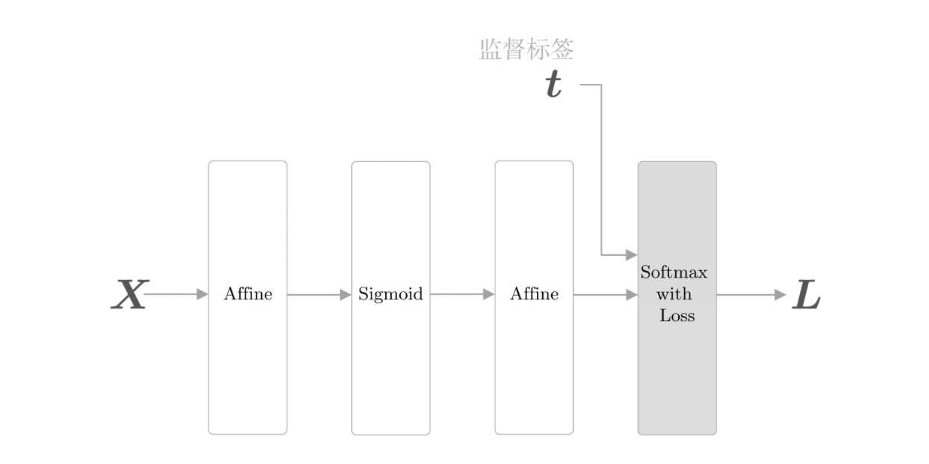

### 导数与梯度

神经网络的学习目标是找到尽可能小的参数。而想找到这些参数，导数和梯度非常重要。

导数定义：导数是数学中微积分的一个重要概念，描述了一个函数在某一点的斜率或者一个函数的变化率。


假设有一个函数$ y=f(x) $,此时，$y$关于$x$的导数记为$ \frac{dy}{dx} $,这个式子的含义是随着x的微小变化y的变化程度。

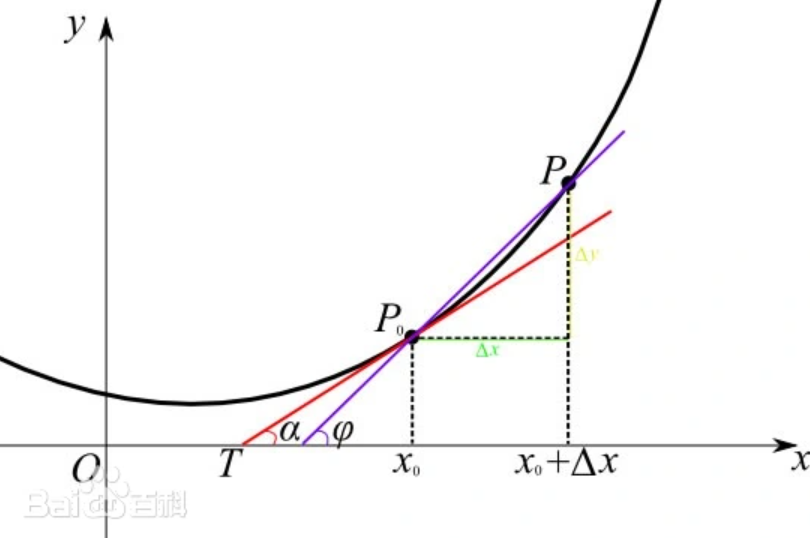

比如，$y = x^2$,其导数为$\frac{dy}{dx} = 2x$,这个导数结果表示x在各处的变化程度。实际上就相当于函数的斜率。

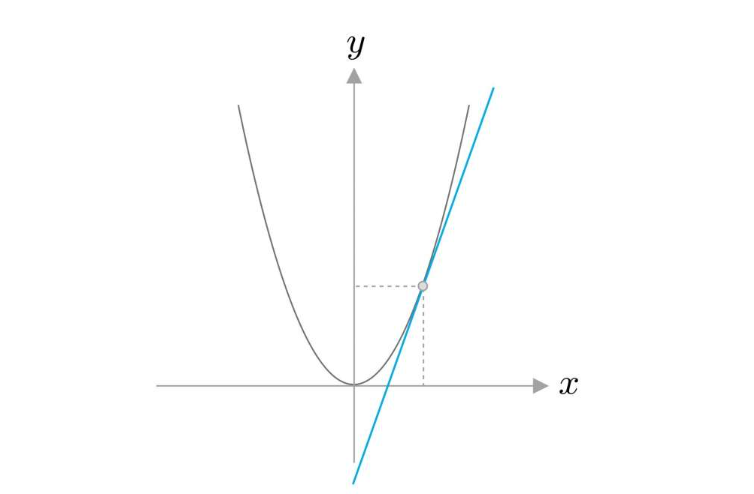

在上图中，我们求了关于x这一个变量的导数，其实同样可以求关于多个变量（多变量）的导数。假设有函数$ L=f（x）$​，其中L是标量，x是向量。此时，L关于$x_i$（x的第i个元素）的导数可以写成$\frac{\partial L}{\partial {x_i}}$。另外，也可以求关于向量的其他元素的导数，我们将其整理如下：
$$ \frac{\partial L}{\partial x} = (\frac{\partial L}{\partial x_1},\frac{\partial L}{\partial x_2},....,\frac{\partial L}{\partial x_n}) $$

像这样，将关于向量各个元素的导数罗列到一起，就得到了梯度（gradient）​。

梯度的定义：梯度一词有时用于斜度，也就是**一个曲面沿着给定方向的倾斜程度。** 可以通过取向量梯度和所研究的方向的点积来得到斜度。 梯度的数值有时也被称为梯度。 梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。

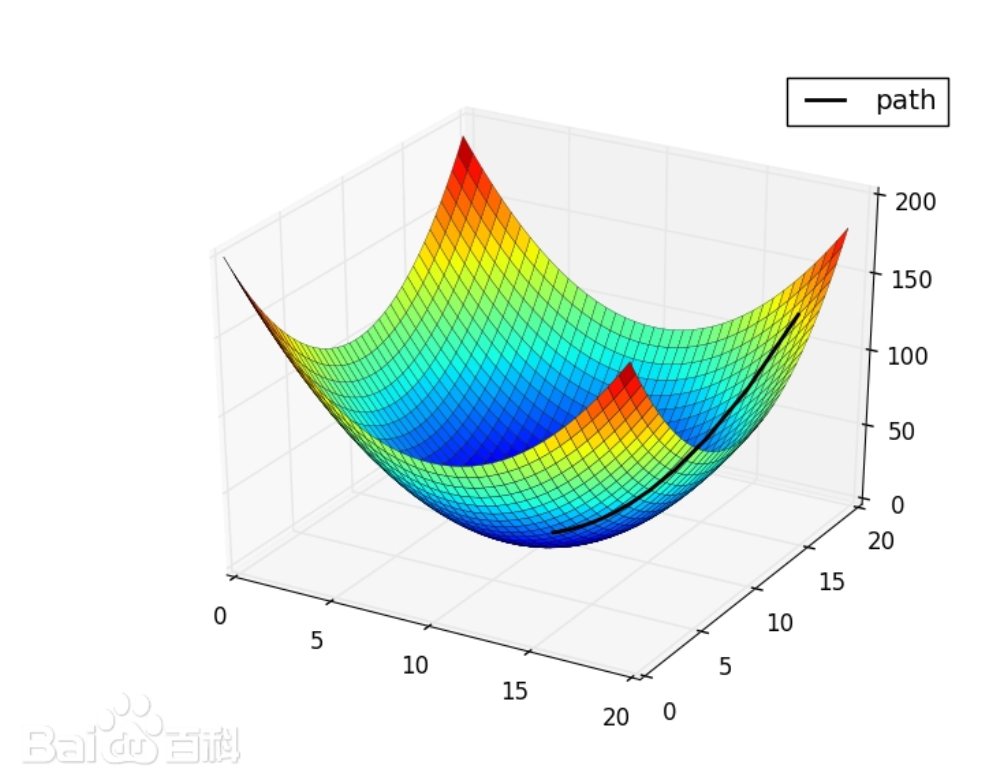

另外，矩阵也可以像向量一样求梯度。假设W是一个m×n的矩阵，则函数L=g（W）的梯度如下所示：

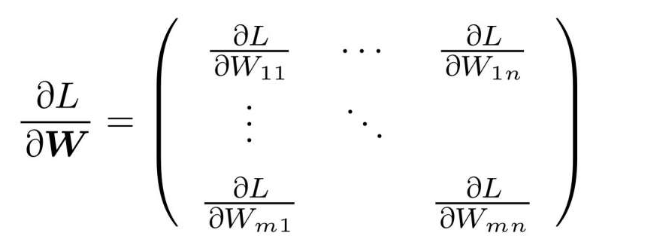

如上式所示，L关于W的梯度可以写成矩阵（准确地说，矩阵的梯度的定义如上所示）​。这里的重点是，W和$\frac{\partial L}{\partial W}$具有相同的形状。利用“矩阵和其梯度具有相同形状”这一性质，可以轻松地进行参数的更新和链式法则（后述）的实现。

### Tip:严格地说

本书使用的“梯度”一词与数学中的“梯度”是不同的。数学中的梯度仅限于关于向量的导数。而在深度学习领域，一般也会定义关于矩阵和张量的导数，称为“梯度”​。

### 链式法则

实际上，神经网络除了第1层和第n层的每一层（n-1层）都有前接后继的关系，其中隐藏层中的每个神经元都含有一个激活函数，输入经过全连接层的仿射关系（$ H = WX+B $）后,在进入隐藏层神经元的激活函数中得到$a(H)$,再经过后面的$Sigmoid$函数进行非线性拟合，在得到一个新的函数$Sigmoid(a(H))$,以此类推，再仿射，再激活，再非线性拟合……这个过程实际上就是一个不断地函数复合的过程。

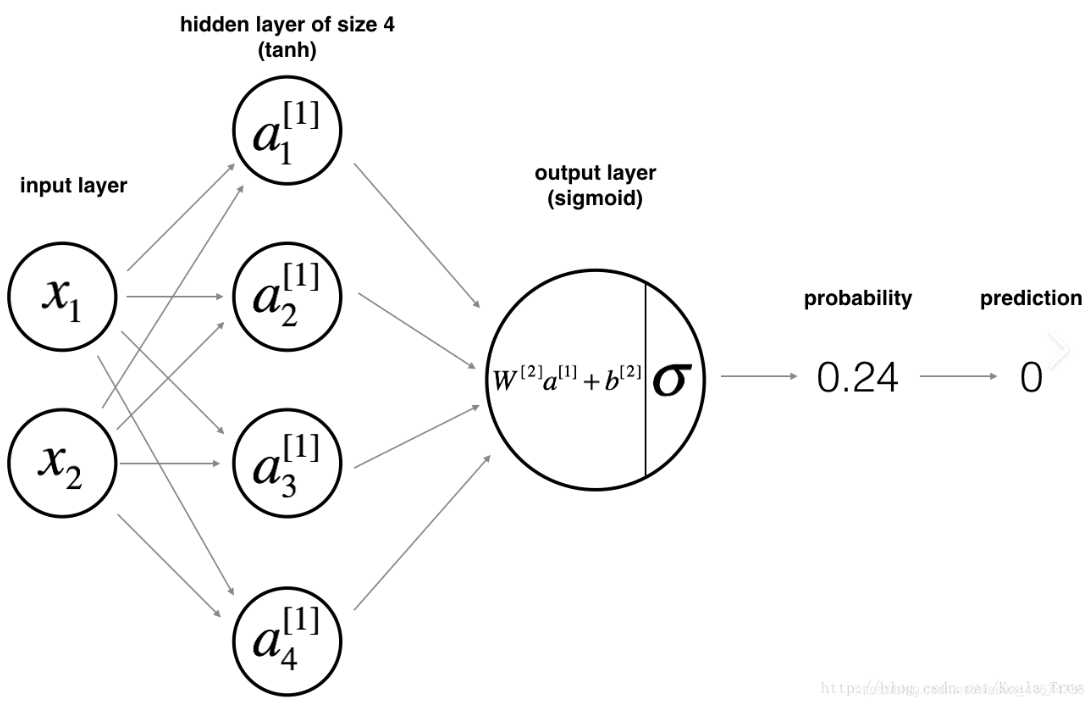

(分享一个好玩的神经网络可视化网站：)[https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40401&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]


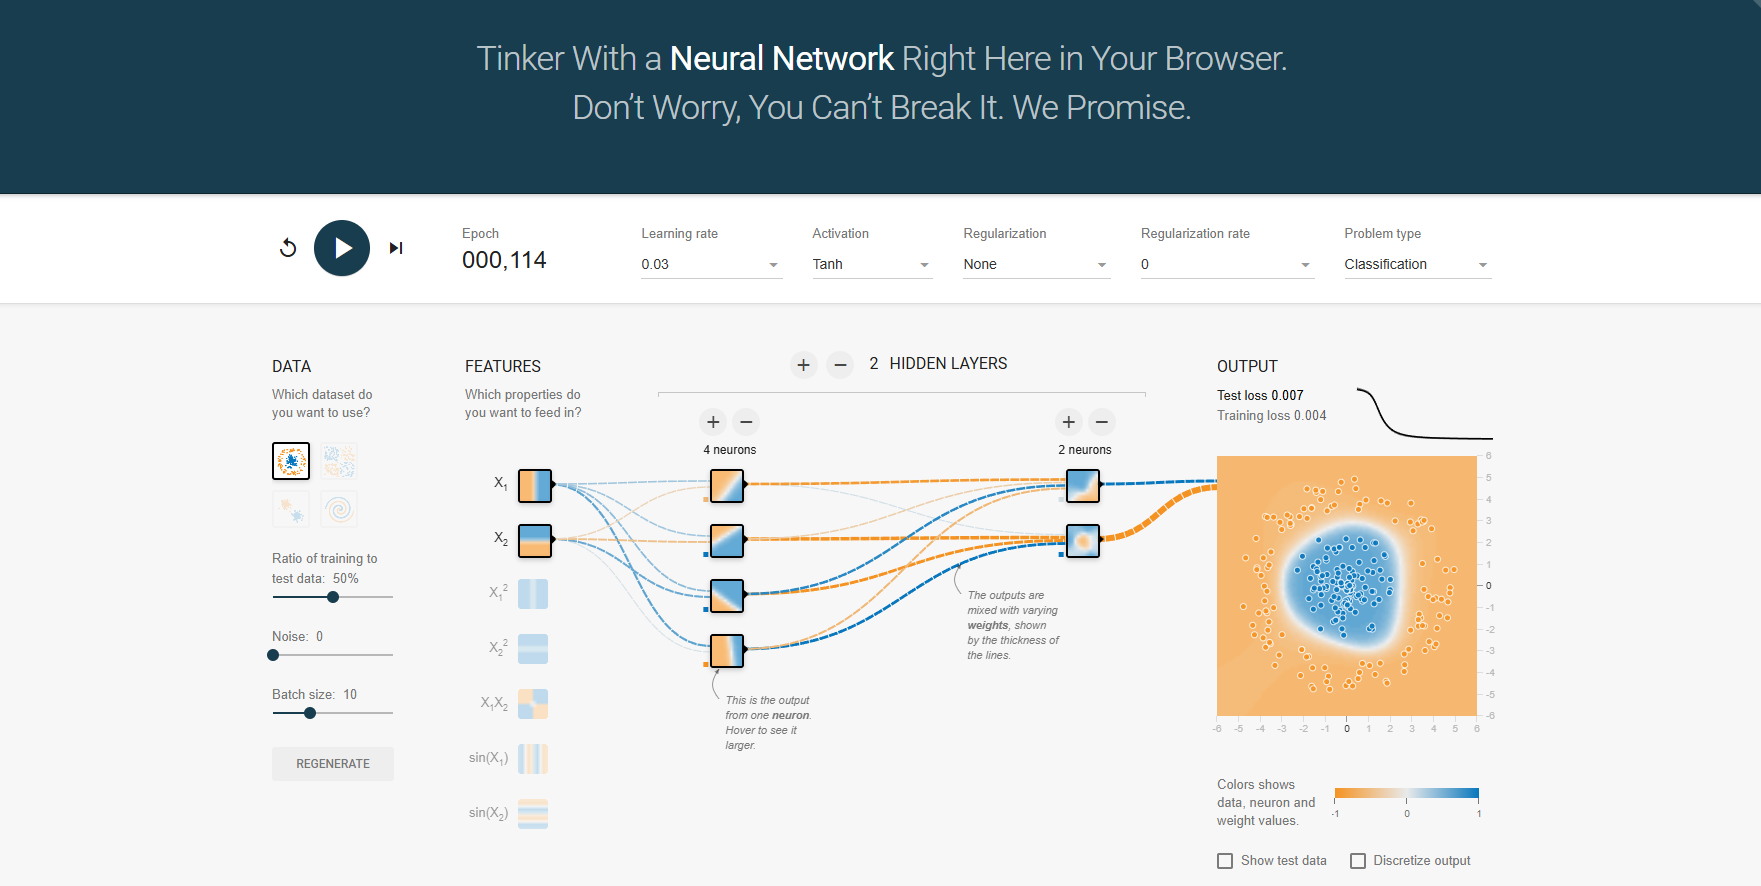

学习阶段的神经网络在给定学习数据后会输出损失。这里我们想得到的是损失关于各个参数的梯度。只要得到了它们的梯度，就可以使用这些梯度进行参数更新。那么，神经网络的梯度怎么求呢？这就轮到误差反向传播法出场了。

理解误差反向传播法的关键是链式法则。链式法则是复合函数的求导法则，其中复合函数是由多个函数构成的函数。

现在，我们来学习链式法则。这里考虑y=f（x）和z=g（y）这两个函数。如z=g（f（x）​）所示，最终的输出z由两个函数计算而来。此时，z关于x的导数可以按下式求得：

$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}·\frac{\partial y}{\partial x}$$

如式所示，z关于x的导数由y=f（x）的导数和z=g（y）的导数之积求得，这就是链式法则。链式法则的重要之处在于，无论我们要处理的函数有多复杂（无论复合了多少个函数）​，都可以根据它们各自的导数来求复合函数的导数。也就是说，只要能够计算各个函数的局部的导数，就能基于它们的积计算最终的整体的导数。

### 计算图

使用计算图能更加直观的展示计算过程。

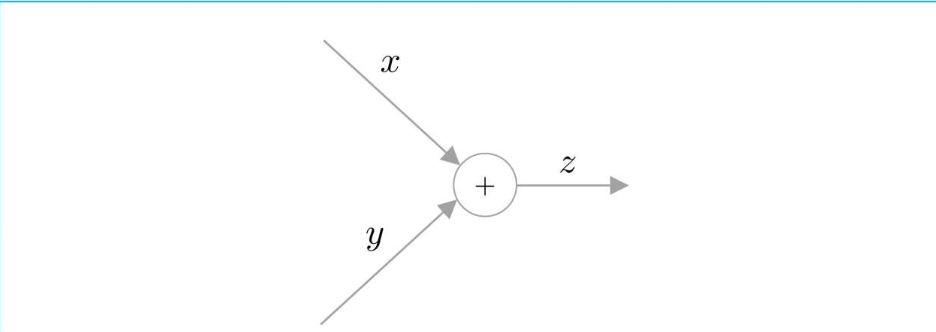


计算图通过节点和箭头来表示。这里，​“+”表示加法，变量x和y写在各自的箭头上。像这样，在计算图中，用节点表示计算，处理结果有序（本例中是从左到右）流动。这就是计算图的正向传播。

使用计算图，可以直观地把握计算过程。另外，这样也可以直观地求梯度。这里重要的是，梯度沿与正向传播相反的方向传播，这个反方向的传播称为反向传播。

### 反向传播

虽然我们处理的是z=x+y这一计算，但是在该计算的前后，还存在其他的“某种计算”​（如下图）​。另外，假设最终输出的是标量L（在神经网络的学习阶段，计算图的最终输出是损失，它是一个标量）​。

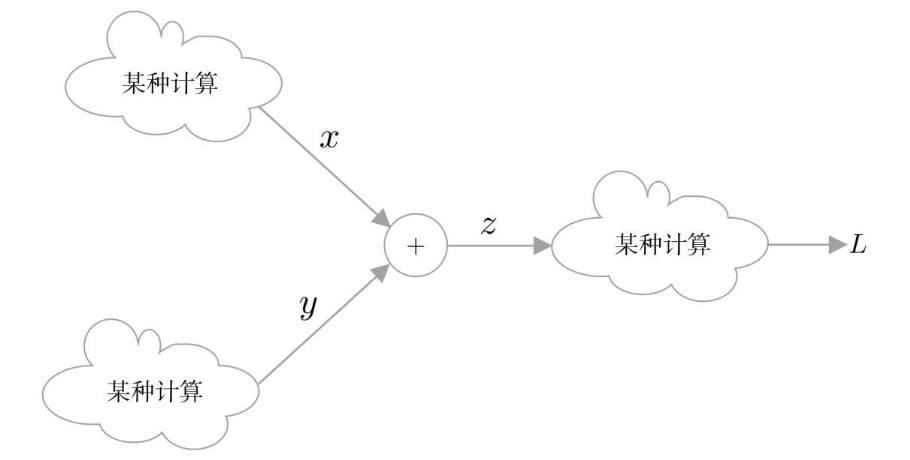

我们的目标是求L关于各个变量的导数（梯度）​。这样一来，计算图的反向传播就可以绘制成下图。

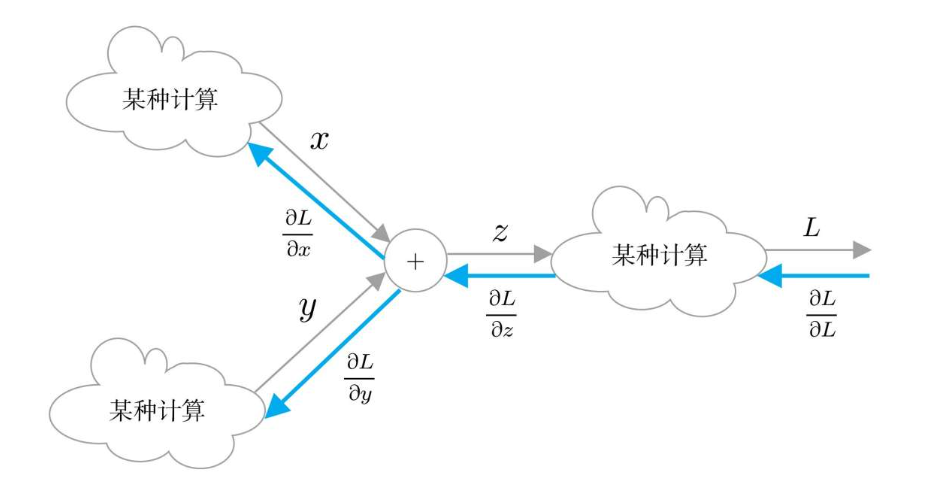

如图所示，反向传播用蓝色的粗箭头表示，在箭头的下方标注传播的值。此时，传播的值是指最终的输出L关于各个变量的导数。在这个例子中，关于z的导数是$ \frac{\partial L}{\partial z} $，关于x和y的导数分别是$ \frac{\partial L}{\partial x} $和$ \frac{\partial L}{\partial y} $。

根据刚才复习的链式法则，反向传播中流动的导数的值是根据从上游（输出侧）传来的导数和各个运算节点的局部导数之积求得的。因此，在上面的例子中，$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial z}·\frac{\partial z}{\partial x}$,$ \frac{\partial L}{\partial y} = \frac{\partial L}{\partial z}·\frac{\partial z}{\partial y}$

这里，我们来处理z=x+y这个基于加法节点的运算。此时，分别解析性地求得$ \frac{\partial z}{\partial x} = 1 $,$ \frac{\partial z}{\partial y}=1 $。因此，如图1-18所示，加法节点将上游传来的值乘以1，再将该梯度向下游传播。也就是说，只是原样地将从上游传来的梯度传播出去。

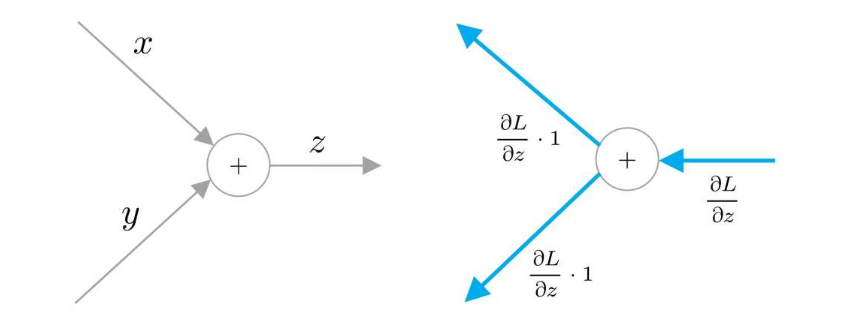

图1-18 加法节点的正向传播（左图）和反向传播（右图）

### 其他典型的运算结点

#### **乘法结点**

乘法节点是z=x×y这样的计算。此时，导数可以分别求出，即$\frac{\partial z}{\partial x} = y$和$\frac{\partial z}{\partial y} = x$。因此，如图1-19所示，乘法节点的反向传播会将“上游传来的梯度”乘以“将正向传播时的输入替换后的值”​。

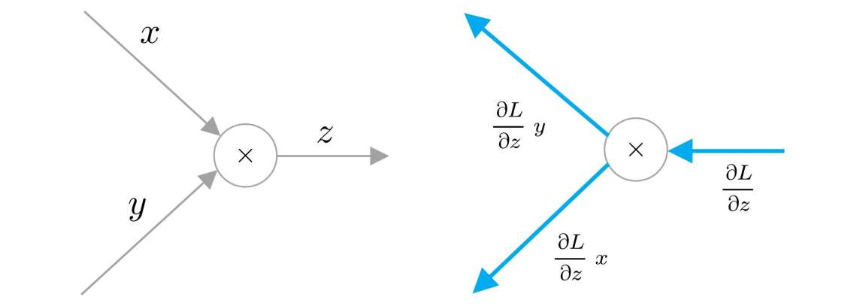

图1-19 乘法节点的正向传播（左图）和反向传播（右图）

#### **分支节点**

如图1-20所示，分支节点是有分支的节点。

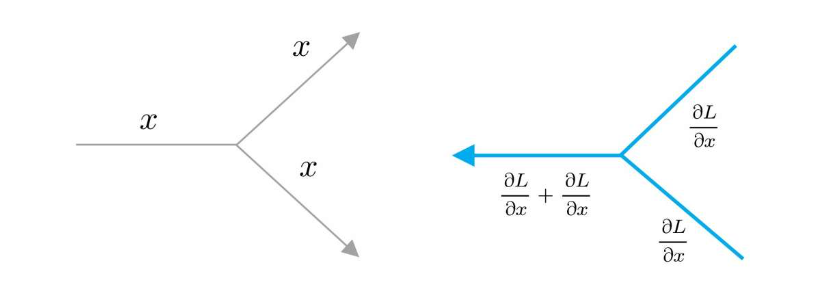

图1-20 分支节点的正向传播（左图）和反向传播（右图）

严格来说，分支节点并没有节点，只有两根分开的线。此时，相同的值被复制并分叉。因此，分支节点也称为复制节点。如图1-20所示，它的反向传播是上游传来的梯度之和。

#### **Repeat节点**

分支节点有两个分支，但也可以扩展为N个分支（副本）​，这里称为Repeat节点。现在，我们尝试用计算图绘制一个Repeat节点（图1-21）​。

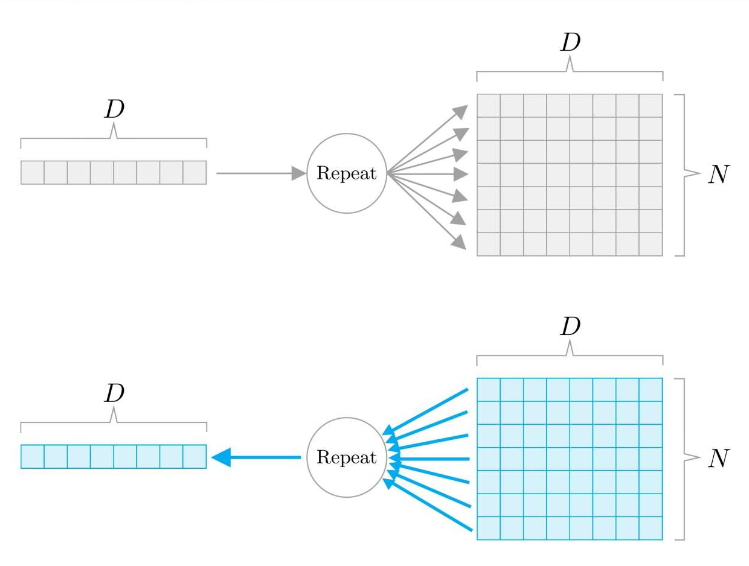

图1-21 Repeat节点的正向传播（上图）和反向传播（下图）

如图1-21所示，这个例子中将长度为D的数组复制了N份。因为这个Repeat节点可以视为N个分支节点，所以它的反向传播可以通过N个梯度的总和求出，如下所示。

In [3]:
import numpy as np

D,N = 8,7 # D-特征数量（数据点维度），N-数据点数量
# 输入
x = np.random.randn(1,D) # x(1,8)
# 正向传播
y = np.repeat(x,N,axis=0) # y(7,8),将x沿着行方向重复N次
# 假设的梯度
dy = np.random.randn(N,D) # dy(7,8),每一行都代表了与数据点相关的梯度或扰动。
# 反向传播
dx = np.sum(dy,axis=0,keepdims=True) # 对 dy 的所有行（axis=0）进行求和，得到一个形状为 (1, D) 的数组（1x8）。
# keepdims=True 的作用是保持结果的二维结构，即结果仍然是 (1, D)，而不是将其压缩成一维 (D,)。

In [4]:
print(x,y,dy,dx)

[[-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]] [[-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]
 [-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]
 [-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]
 [-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]
 [-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]
 [-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]
 [-0.65398062  0.17582954  1.40937608 -0.96070201 -1.26623082  0.73848146
  -1.46208389 -0.929922  ]] [[-0.90802981  1.29492835 -0.08913975 -1.05449559  1.52160534  1.66412136
   1.28437637  0.10368702]
 [ 0.71989271 -1.0449534   0.50564523 -1.28796732 -1.16791928 -2.67012599
  -0.36123667 -

#### **Sum节点**

Sum节点是通用的加法节点。这里考虑对一个N×D的数组沿第0个轴求和。此时，Sum节点的正向传播和反向传播如图1-22所示。

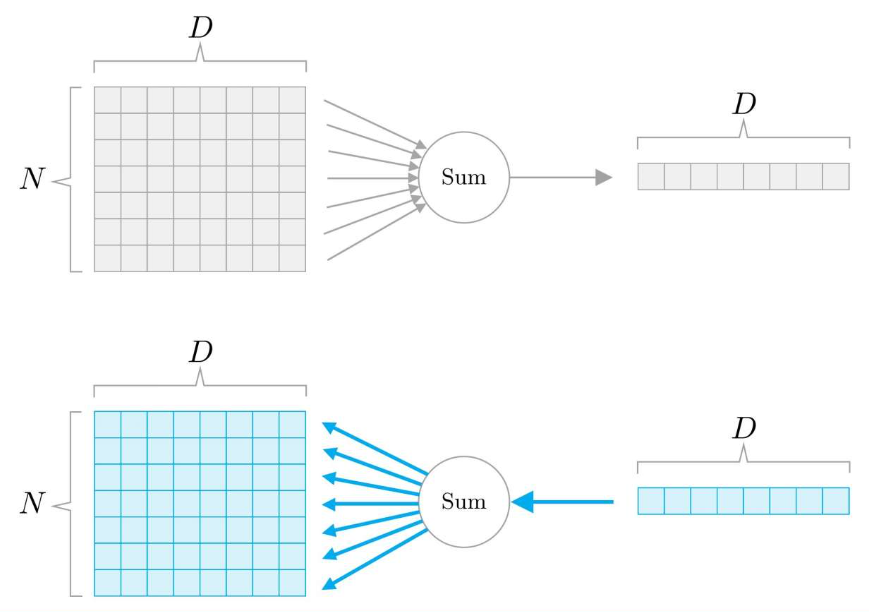

图1-22 Sum节点的正向传播（上图）和反向传播（下图）

如图1-22所示，Sum节点的反向传播将上游传来的梯度分配到所有箭头上。这是加法节点的反向传播的自然扩展。下面，和Repeat节点一样，我们也来展示一下Sum节点的实现示例，如下所示。

In [5]:
import numpy as np
D,N = 8,7 
x = np.random.randn(N,D) # 输入
y = np.sum(x,axis=0,keepdims=True) # 正向传播
dy = np.random.randn(1,D) # 假设的梯度
dx = np.repeat(dy,N,axis=0) # 反向传播

In [7]:
print(x,y,dy,dx)

[[ 0.89537097  0.22432744  0.94135199 -2.2696392  -0.72565332 -0.79235767
   0.05426546 -0.5941178 ]
 [ 0.68011678  0.49310042  0.81607618 -1.09238102  0.82414314 -0.62151216
   1.02772305  1.09321035]
 [-0.46208365  0.59195862  0.67912749 -1.92346964  0.56483658  0.87066596
  -1.47871334  0.64403717]
 [ 0.42761419  0.10318995 -0.80747833  0.01638887  1.24014633 -0.68491584
  -1.8335278  -2.06326384]
 [-0.25659482  0.24308573  1.00591128 -0.65020313 -0.04504154 -0.26665785
  -1.62130109  1.21561124]
 [ 1.04537524 -0.60882174  0.79904833 -1.74358711 -0.22525197 -0.20221027
   1.31600569 -0.29160988]
 [ 0.37403777  0.95148592  0.64760357  0.91545427  0.27634025 -0.27963649
   0.2418728  -0.43913995]] [[ 2.70383648  1.99832633  4.08164051 -6.74743696  1.90951947 -1.97662431
  -2.29367523 -0.43527271]] [[ 0.18801312 -0.82046416 -1.15742412  0.00263969  1.96304172  1.14687676
   0.19588645 -2.20671411]] [[ 0.18801312 -0.82046416 -1.15742412  0.00263969  1.96304172  1.14687676
   0.19588645 

如上所示，Sum节点的正向传播通过np.sum（​）方法实现，反向传播通过np.repeat（​）方法实现。有趣的是，Sum节点和Repeat节点存在逆向关系。所谓逆向关系，是指Sum节点的正向传播相当于Repeat节点的反向传播，Sum节点的反向传播相当于Repeat节点的正向传播。

#### **MatMul节点**

本书将矩阵乘积称为MatMul节点。MatMul是Matrix Multiply的缩写。因为MatMul节点的反向传播稍微有些复杂，所以这里我们先进行一般性的介绍，再进行直观的解释。


为了解释MatMul节点，我们来考虑y=xW这个计算。这里，x、W、y的形状分别是1×D、D×H、1×H（图1-23）​。

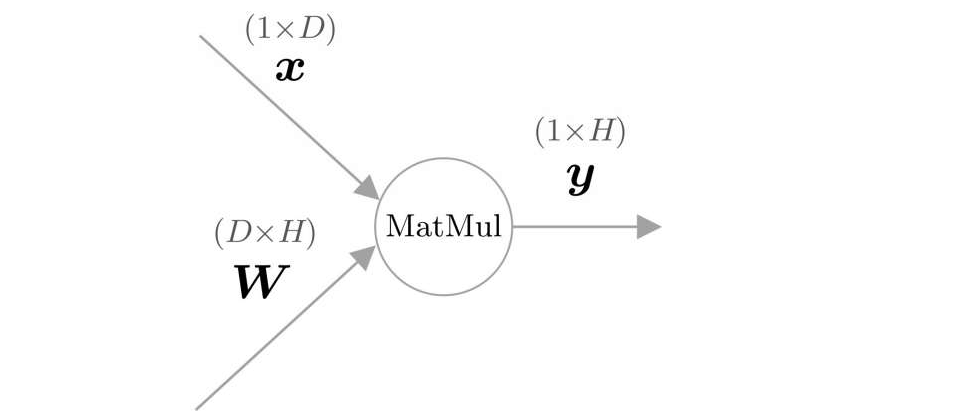

图1-23 MatMul节点的正向传播：矩阵的形状显示在各个变量的上方

此时，可以按如下方式求得关于x的第i个元素的导数$\frac{\partial L}{\partial x_i}$。

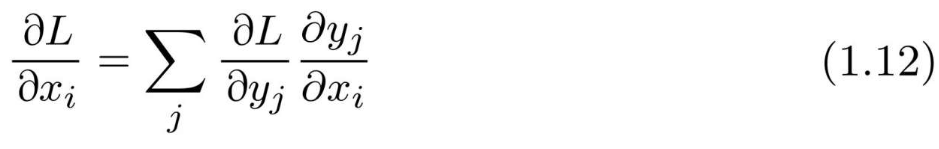

式（1.12）的$\frac{\partial L}{\partial x_i}$表示变化程度，即当xi发生微小的变化时，L会有多大程度的变化。如果此时改变xi，则向量y的所有元素都会发生变化。另外，因为y的各个元素会发生变化，所以最终L也会发生变化。因此，从xi到L的链式法则的路径有多个，它们的和是$\frac{\partial L}{\partial x_i}$。

式（1.12）仍可进一步简化。利用$\frac{\partial y_i}{\partial x_i}=W_{ij}$，将其代入式（1.12）​：

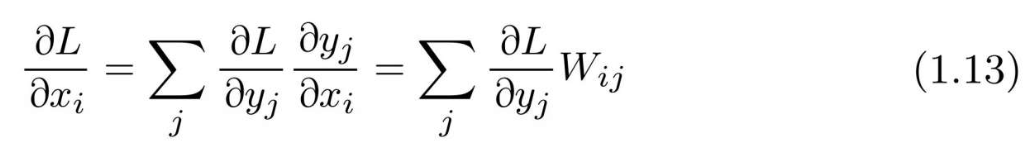

由式（1.13）可知，$\frac{\partial L}{\partial x_i}$由向量$\frac{\partial L}{\partial y}$和W的第i行向量的内积求得。从这个关系可以导出下式：

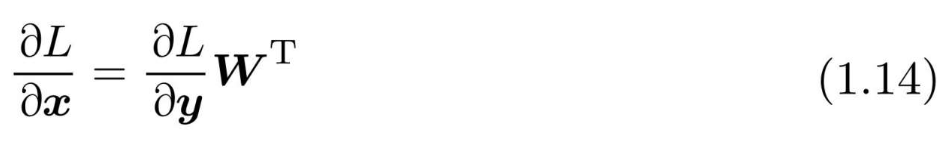

如式（1.14）所示，$\frac{\partial L}{\partial x}$可由矩阵乘积一次求得。这里，$W^T$的T表示转置矩阵。对式（1.14）进行形状检查，结果如图1-24所示。

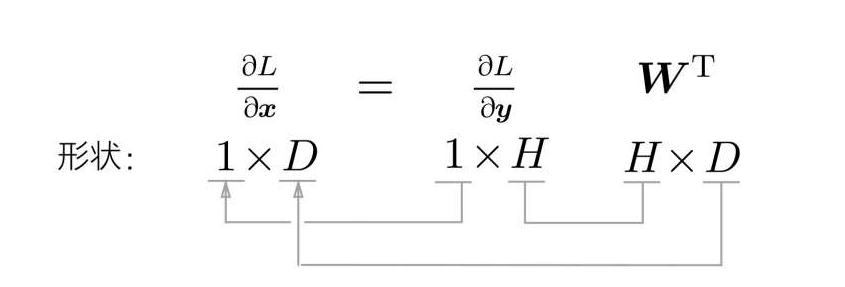

如图1-24所示，矩阵形状的演变是正确的。由此，可以确认式（1.14）的计算是正确的。然后，我们可以反过来利用它（为了保持形状合规）来推导出反向传播的数学式（及其实现）​。为了说明这个方法，我们再次考虑矩阵乘积的计算y=xW。不过，这次考虑mini-batch处理，假设x中保存了N笔数据。此时，x、W、y的形状分别是N×D、D×H、N×H，反向传播的计算图如图1-25所示。

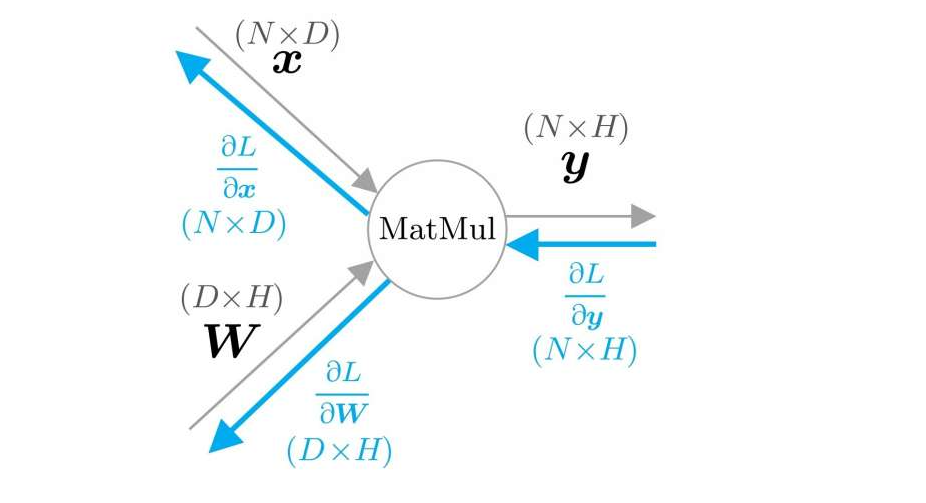

那么，$\frac{\partial L}{\partial x}$将如何计算呢？此时，和$\frac{\partial L}{\partial x}$相关的变量（矩阵）是上游传来的$\frac{\partial L}{\partial y}$和W。为什么说和W有关系呢？考虑到乘法的反向传播的话，就容易理解了。因为乘法的反向传播中使用了“将正向传播时的输入替换后的值”​。同理，矩阵乘积的反向传播也使用“将正向传播时的输入替换后的矩阵”​。之后，留意各个矩阵的形状求矩阵乘积，使它们的形状保持合规。如此，就可以导出矩阵乘积的反向传播，如图1-26所示。

如图1-26所示，通过确认矩阵的形状，可以推导矩阵乘积的反向传播的数学式。这样一来，我们就推导出了MatMul节点的反向传播。现在我们将MatMul节点实现为层，如下所示

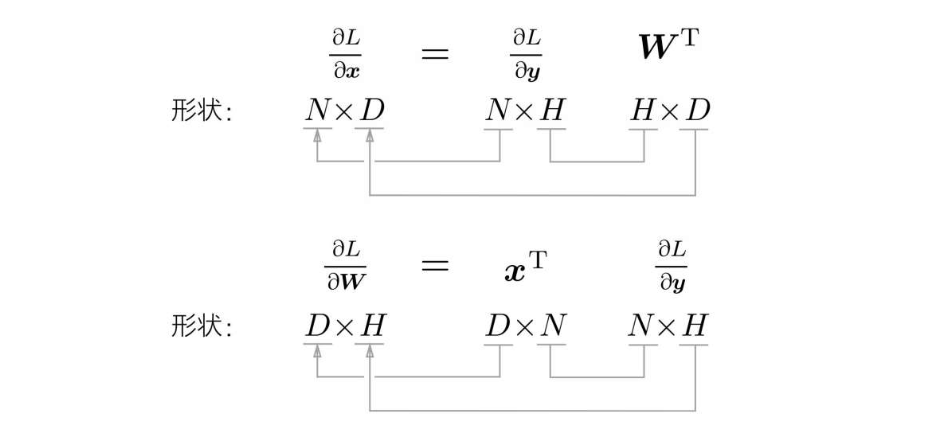

In [ ]:
import numpy as np

class MatMul:
    def __init__(self, W):
        # 初始化权重矩阵 W 和梯度
        self.params = [W]  # 存储参数（权重）
        self.grads = [np.zeros_like(W)]  # 初始化梯度为零矩阵
        self.x = None  # 存储输入

    def forward(self, x):
        # 前向传播：计算输出
        W, = self.params  # 解包权重
        out = np.dot(x, W)  # 计算 x 与 W 的点乘
        self.x = x  # 保存输入 x 以备反向传播使用
        return out  # 返回输出

    def backward(self, dout):
        # 反向传播：计算梯度
        W, = self.params  # 解包权重
        dx = np.dot(dout, W.T)  # 计算损失相对于输入的梯度
        dW = np.dot(self.x.T, dout)  # 计算损失相对于权重的梯度
        self.grads[0][...] = dW  # 更新权重的梯度
        return dx  # 返回输入的梯度


MatMul层在params中保存要学习的参数。另外，以与其对应的形式，将梯度保存在grads中。在反向传播时求dx和dw，并在实例变量grads中设置权重的梯度。另外，在设置梯度的值时，像grads[0]​[...] = dW这样，使用了省略号。由此，可以固定NumPy数组的内存地址，覆盖NumPy数组的元素。

### Tip:浅拷贝和深拷贝的差异

和省略号一样，这里也可以进行基于grads[0] = dW的赋值。不同的是，在使用省略号的情况下会覆盖掉NumPy数组。这是浅复制（shallow copy）和深复制（deep copy）的差异。grads[0] = dW的赋值相当于浅复制，grads[0]​[...] = dW的覆盖相当于深复制。

省略号的话题稍微有些复杂，我们举个例子来说明。假设有a和b两个NumPy数组。

In [4]:
a = np.array([1,2,3])
b = np.array([4,5,6])

这里，不管是a = b，还是a[...] = b,a都被赋值[4,5,6]​。但是，此时a指向的内存地址不同。我们将内存（简化版）可视化，如图1-27所示。

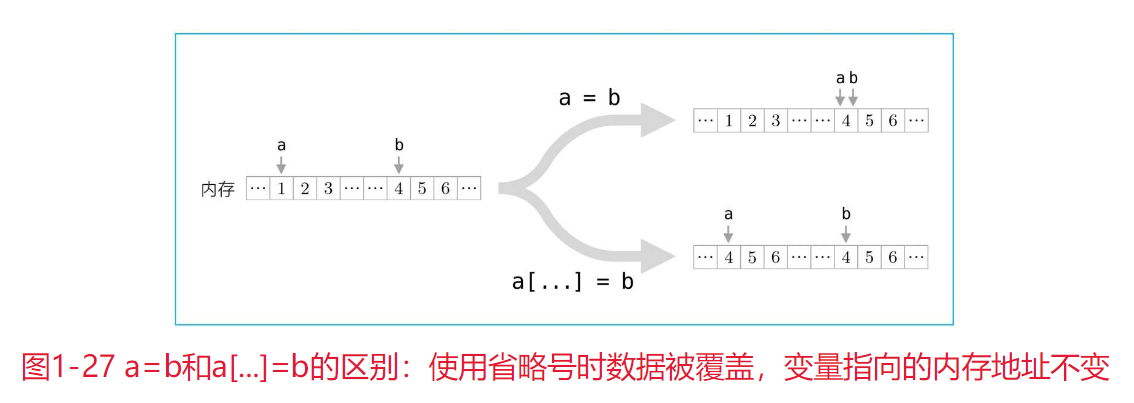

如图1-27所示，在a = b的情况下，a指向的内存地址和b一样。由于实际的数据（4,5,6）没有被复制，所以这可以说是浅复制。而在a[...] = b时，a的内存地址保持不变，b的元素被复制到a指向的内存上。这时，因为实际的数据被复制了，所以称为深复制。

由此可知，使用省略号可以固定变量的内存地址（在上面的例子中，a的地址是固定的）​。通过固定这个内存地址，实例变量grads的处理会变简单。

在grads列表中保存各个参数的梯度。此时，grads列表中的各个元素是NumPy数组，仅在生成层时生成一次。然后，使用省略号，在不改变NumPy数组的内存地址的情况下覆盖数据。这样一来，将梯度汇总在一起的工作就只需要在开始时进行一次即可。

### 梯度的推导和反向传播的实现

下面我们来实现一些实用的层。这里，我们将实现Sigmoid层、全连接层Affine层和Softmax with Loss层。

#### **Sigmoid层**

sigmoid函数由$y = \frac{1}{1+e^{-x}}$表示，sigmoid函数的导数由下式表示。

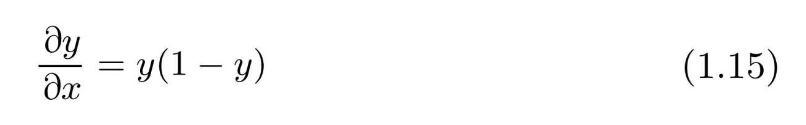

根据式（1.15）,Sigmoid层的计算图可以绘制成图1-28。这里，将输出侧的层传来的梯度（$\frac{\partial L}{\partial y}$）乘以sigmoid函数的导数（$\frac{\partial L}{\partial x}$）​，然后将这个值传递给输入侧的层。

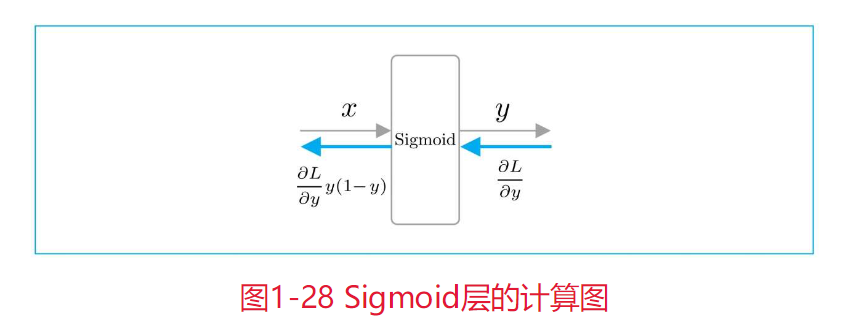

使用Python来实现Sigmoid层。

In [5]:
import numpy as np

class Sigmoid:
    def __init__(self):
        # Sigmoid 层不包含参数和梯度
        self.params = []  # 没有可训练的参数
        self.grads = []   # 没有参数的梯度
        self.out = None   # 保存 Sigmoid 函数的输出，用于反向传播

    def forward(self, x):
        # 前向传播：计算 Sigmoid 函数的输出
        # Sigmoid 函数：f(x) = 1 / (1 + exp(-x))
        out = 1 / (1 + np.exp(-x))  # 计算 Sigmoid 激活
        self.out = out  # 保存输出，用于反向传播
        return out  # 返回前向传播的结果

    def backward(self, dout):
        # 反向传播：计算梯度
        # Sigmoid 函数的导数：f'(x) = f(x) * (1 - f(x))
        dx = dout * (1.0 - self.out) * self.out  # 链式法则：dL/dx = dL/dout * dout/dx
        return dx  # 返回输入的梯度


这里将正向传播的输出保存在实例变量out中。然后，在反向传播中，使用这个out变量进行计算。

#### Affine层

如前所示，我们通过y = np.dot（x, W） + b实现了Affine层的正向传播。此时，在偏置的加法中，使用了NumPy的广播功能。如果明示这一点，则Affine层的计算图如图1-29所示。

如图1-29所示，通过MatMul节点进行矩阵乘积的计算。偏置被Repeat节点复制，然后进行加法运算（可以认为NumPy的广播功能在内部进行了Repeat节点的计算）​。下面是Affine层的实现

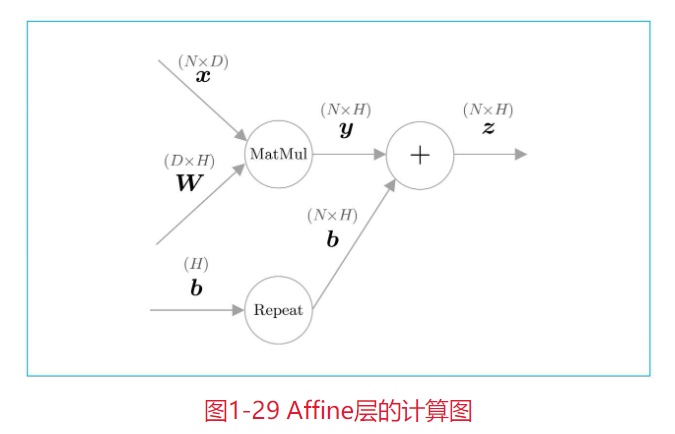

In [6]:
import numpy as np

class Affine:
    def __init__(self, W, b):
        # 初始化权重矩阵 W 和偏置 b
        self.params = [W, b]  # 存储权重和偏置
        # 初始化梯度为与 W 和 b 形状相同的零矩阵
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None  # 用于存储输入，供反向传播时使用

    def forward(self, x):
        # 前向传播：计算仿射变换 (线性变换 + 偏置)
        W, b = self.params  # 获取权重和偏置
        # 仿射变换公式：out = xW + b
        out = np.dot(x, W) + b  # 矩阵乘法 xW 加上偏置 b
        self.x = x  # 保存输入 x，以备反向传播使用
        return out  # 返回仿射层的输出

    def backward(self, dout):
        # 反向传播：计算输入和参数的梯度
        W, b = self.params  # 获取权重和偏置
        # 计算输入的梯度：dx = dout * W^T
        dx = np.dot(dout, W.T)
        # 计算权重的梯度：dW = x^T * dout
        dW = np.dot(self.x.T, dout)
        # 计算偏置的梯度：db = dout 在每个样本上按列求和
        db = np.sum(dout, axis=0)

        # 更新权重和偏置的梯度
        self.grads[0][...] = dW  # 存储权重的梯度
        self.grads[1][...] = db  # 存储偏置的梯度
        return dx  # 返回输入的梯度


根据本书的代码规范，Affine层将参数保存在实例变量params中，将梯度保存在实例变量grads中。它的反向传播可以通过执行MatMul节点和Repeat节点的反向传播来实现。Repeat节点的反向传播可以通过np.sum（​）计算出来，此时注意矩阵的形状，就可以清楚地知道应该对哪个轴（axis）求和。最后，将权重参数的梯度设置给实例变量grads。以上就是Affine层的实现。

使用已经实现的MatMul层，可以更轻松地实现Affine层。这里出于复习的目的，没有使用MatMul层，而是使用NumPy的方法进行了实现。

#### **Softmax with Loss层**

我们将Softmax函数和交叉熵误差一起实现为Softmax with Loss层。此时，计算图如图1-30所示。

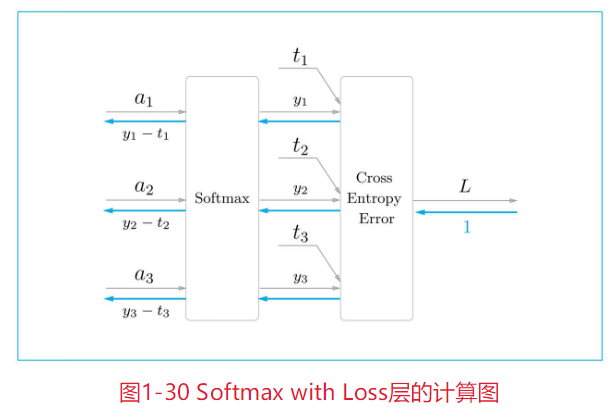

图1-30的计算图将Softmax函数记为Softmax层，将交叉熵误差记为Cross Entropy Error层。这里假设要执行3类别分类的任务，从前一层（靠近输入的层）接收3个输入。如图1-30所示，Softmax层对输入a1, a2, a3进行正规化，输出y1, y2, y3。Cross Entropy Error层接收Softmax的输出y1, y2, y3和监督标签t1, t2, t3，并基于这些数据输出损失L。

在图1-30中，需要注意的是反向传播的结果。从Softmax层传来的反向传播有y1-t1, y2-t2, y3-t3这样一个很“漂亮”的结果。因为y1, y2, y3是Softmax层的输出，t1, t2, t3是监督标签，所以y1-t1, y2-t2, y3-t3是Softmax层的输出和监督标签的差分。神经网络的反向传播将这个差分（误差）传给前面的层。这是神经网络的学习中的一个重要性质。

### 权重的更新——随机梯度下降算法

通过误差反向传播法求出梯度后，就可以使用该梯度更新神经网络的参数。此时，神经网络的学习按如下步骤进行。

- step1:mini-batch

    从训练数据中随机选出多笔数据。

- step2:计算梯度

    基于误差反向传播法，计算损失函数关于各个权重参数的梯度。

- step3：更新参数

    使用梯度更新权重参数。

- step4：重复

    根据需要重复多次步骤1、步骤2和步骤3。


我们按照上面的步骤进行神经网络的学习。首先，选择mini-batch数据，根据误差反向传播法获得权重的梯度。这个梯度指向当前的权重参数所处位置中损失增加最多的方向。因此，通过将参数向该梯度的反方向更新，可以降低损失。这就是梯度下降法（gradient descent）​。之后，根据需要将这一操作重复多次即可。

我们在上面的步骤3中更新权重。权重更新方法有很多，这里我们来实现其中最简单的随机梯度下降法（Stochastic Gradient Descent,SGD）​。其中，​“随机”是指使用随机选择的数据（mini-batch）的梯度。

SGD是一个很简单的方法。它将（当前的）权重朝梯度的（反）方向更新一定距离。如果用数学式表示，则有：

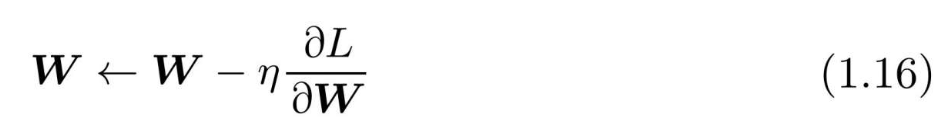

这里将要更新的权重参数记为W，损失函数关于W的梯度记为$\frac{\partial L}{\partial W}$。η表示学习率，实际上使用0.01、0.001等预先定好的值。

现在，我们来进行SGD的实现。这里考虑到模块化，将进行参数更新的类实现在common/optimizer.py中。除了SGD之外，这个文件中还有AdaGrad和Adam等的实现。

进行参数更新的类的实现拥有通用方法update（params, grads）​。这里，在参数params和grads中分别以列表形式保存了神经网络的权重和梯度。此外，假定params和grads在相同索引处分别保存了对应的参数和梯度。这样一来，SGD就可以像下面这样实现（common/optimizer.py）​。

In [11]:
class SGD:
    def __init__(self, lr=0.01):
        # 初始化优化器，设定学习率（lr）
        self.lr = lr  # 学习率，控制每次参数更新的步长

    def update(self, params, grads):
        # 更新模型参数
        # params：模型的参数列表（如权重和偏置）
        # grads：与 params 对应的梯度列表
        for i in range(len(params)):  # 遍历每个参数
            # 使用随机梯度下降法更新参数
            # 更新公式：参数 = 参数 - 学习率 * 梯度
            params[i] -= self.lr * grads[i]  # 更新参数


初始化参数lr表示学习率（learning rate）​。这里将学习率保存为实例变量。然后，在update（params, grads）方法中实现参数的更新处理。

使用这个SGD类，神经网络的参数更新可按如下方式进行（下面的代码是不能实际运行的伪代码）​。

```
# 初始化两层神经网络模型
model = TwoLayerNet(...)  # 创建一个包含两层（比如：Affine + ReLU + Affine + Softmax）的神经网络

# 初始化优化器，使用随机梯度下降法（SGD）
optimizer = SGD()  # 创建一个SGD优化器实例，用于更新模型参数

# 进行10000次训练迭代
for i in range(10000):
    # 获取一个 mini-batch 样本及对应的标签
    x_batch, t_batch = get_mini_batch(...)  # 从训练数据中提取一小批样本 (mini-batch)，提高训练效率并减少内存占用

    # 进行前向传播，计算当前 mini-batch 的损失
    loss = model.forward(x_batch, t_batch)  # 将 mini-batch 输入模型，并计算损失函数值 (比如交叉熵损失)

    # 进行反向传播，计算梯度
    model.backward()  # 基于损失函数的输出，计算模型参数（权重和偏置）的梯度

    # 使用优化器更新模型的参数
    optimizer.update(model.params, model.grads)  # 利用计算得到的梯度，更新模型的参数（比如权重、偏置）

    # 可以在这里添加额外的代码，如：记录损失值，打印训练进度等


```

像这样，通过独立实现进行最优化的类，系统的模块化会变得更加容易。除了SGD外，本书还实现了AdaGrad和Adam等方法